<a href="https://colab.research.google.com/github/sahil3Vedi/Incremental-Optimisation-CNNs/blob/main/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
'''
Implementing LeNet 5 on the MNIST dataset using Keras
'''
# Credits to https://github.com/vaibhavcodes/DeepLearning-Architectures for providing the starter code

# Importing Libraries
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, AvgPool2D, Flatten, Dense
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
# Image processing & plotting
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset and performing train-test split
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Checking the sizes of train and test split
print("The size of train_x is: {}".format(train_x.shape))
print("The size of train_y is: {}".format(train_y.shape))
print("The size of test_x is: {}".format(test_x.shape))
print("The size of test_y is: {}".format(test_y.shape))

# Performing reshaping operations = Converting into 4D
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

# Normalizing the values of the image- Converting in between 0 and 1
train_x = train_x/255.0
test_x = test_x/255.0

# One-hot encoding the labels
train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)

11501568/11490434 [==============================] - 0s 0us/step
The size of train_x is: (60000, 28, 28)
The size of train_y is: (60000,)
The size of test_x is: (10000, 28, 28)
The size of test_y is: (10000,)


In [3]:
# Building the Model Architecture

# Instanciate an empty model
model = Sequential()

# Adding a Convolution Layer C1
# Input shape = N = (28 x 28)
# No. of filters  = 6
# Filter size = f = (5 x 5)
# Padding = P = 0
# Strides = S = 1
# Size of each feature map in C1 is (N-f+2P)/S +1 = 28-5+1 = 24
# No. of parameters between input layer and C1 = (5*5 + 1)*6 = 156
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='valid', input_shape=(28,28,1), activation='tanh'))

# Adding an Average Pooling Layer S2
# Input shape = N = (24 x 24)
# No. of filters = 6
# Filter size = f = (2 x 2)
# Padding = P = 0
# Strides = S = 2
# Size of each feature map in S2 is (N-f+2P)/S +1 = (24-2+0)/2+1 = 11+1 = 12
# No. of parameters between C1 and S2 = (1+1)*6 = 12
model.add(AvgPool2D(pool_size=(2,2)))

# Adding a Convolution Layer C3
# Input shape = N = (12 x 12)
# No. of filters  = 16
# Filter size = f = (5 x 5)
# Padding = P = 0
# Strides = S = 1
# Size of each feature map in C3 is (N-f+2P)/S +1 = 12-5+1 = 8
# No. of parameters between S2 and C3 = (5*5*6*16 + 16) + 16 = 2416
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='tanh'))

# Adding an Average Pooling Layer S4
# Input shape = N = (8 x 8)
# No. of filters = 16
# Filter size = f = (2 x 2)
# Padding = P = 0
# Strides = S = 2
# Size of each feature map in S4 is (N-f+2P)/S +1 = (8-2+0)/2+1 = 3+1 = 4
# No. of parameters between C3 and S4 = (1+1)*16 = 32
model.add(AvgPool2D(pool_size=(2,2)))

# As compared to LeNet-5 architecture there was one more application of convolution but in our code  further application of 
# convolution with (5 x 5) filter would result in a negative dimension which is not possible. So we aren't applying any more
# convolution here.

# Flattening the layer S4
# There would be 16*(4*4) = 256 neurons
model.add(Flatten())

# Adding a Dense layer with `tanh` activation+# 
# No. of inputs = 256
# No. of outputs = 120
# No. of parameters = 256*120 + 120 = 30,840
model.add(Dense(120, activation='tanh'))

# Adding a Dense layer with `tanh` activation
# No. of inputs = 120
# No. of outputs = 84
# No. of parameters = 120*84 + 84 = 10,164
model.add(Dense(84, activation='tanh'))

# Adding a Dense layer with `softmax` activation
# No. of inputs = 84
# No. of outputs = 10
# No. of parameters = 84*10 + 10 = 850
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [4]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=128, epochs=20, verbose=1, validation_data=(test_x, test_y))

Epoch 1/20
469/469 [==============================] - 32s 7ms/step - loss: 0.3452 - accuracy: 0.9020 - val_loss: 0.1561 - val_accuracy: 0.9532
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1274 - accuracy: 0.9611 - val_loss: 0.0995 - val_accuracy: 0.9683
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0820 - accuracy: 0.9747 - val_loss: 0.0697 - val_accuracy: 0.9767
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0618 - accuracy: 0.9808 - val_loss: 0.0653 - val_accuracy: 0.9798
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0500 - accuracy: 0.9851 - val_loss: 0.0554 - val_accuracy: 0.9815
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.0519 - val_accuracy: 0.9821
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0453 - val_accuracy: 0.9847
Epoch

In [15]:
# Finding the loss and accuracy of the model
score = model.evaluate(test_x, test_y)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9863
Test Loss: 0.04769694805145264
Test accuracy: 0.986299991607666


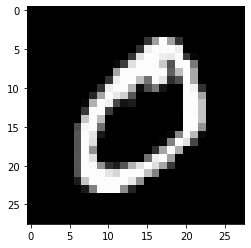

In [24]:
sample_input  = train_x[1].reshape(28,28)
fig = plt.figure
plt.imshow(sample_input, cmap='gray')
plt.show()